## (Properly) Fitting a Straight Line

Let's now take a look at another example where adequate priors are important and influence the final result: the fitting of a straight line to (x,y) data. An excellent discussion of this case can be found in a 
[blog by Jake VanderPlas](http://jakevdp.github.io/blog/2014/06/14/frequentism-and-bayesianism-4-bayesian-in-python/). A great reference mentioned in that blog is a paper by Jaynes: "Straight Line Fitting: A Bayesian Solution"

## Maximum Likelihood Approach

Last week we covered the MLE approach to fitting a straight line - let's recall what we did.

Assume the scatter in our measurements (the residuals) is generated by a gaussian process. I.e.:

$$ y_i = a x_i + b + r_i $$

where $r_i$ is drawn from $N(0, \sigma)$. Here, $\sigma$ is the known homoscedastic measurement 
uncertainty for $y$ (and we assume that the uncertainty for x is negligible). 

Assuming the measurements are independent, the likelihood is the product of individual probabilities 
for every $y_i$:

$$ L(a, b) = \prod_{i=1}^N \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left( - \frac{(y_i - a x_i - b)^2}{2 \sigma^2} \right) $$

and $\ln L$ is equal to:

$$ \ln L(a, b) = constant - \frac{1}{2 \sigma^2} \sum_{i=1}^N (y_i - a x_i - b)^2.$$

This is the expression that the MLE minimizes with respect to $a$ and $b$ to find ML estimators for those parameters. 

## Bayesian Approach

In Bayesian approach we have for the posterior probability

$$ p(a, b \,|\, \{x_i,y_i\}) \propto L(a, b) \, p(a) \, p(b), $$

where $p(a)$ and $p(b)$ are priors for $a$ and $b$ (where we're assuming the two are independent).

Question: if we interpret MLE in the Baeyesian approach, what priors have we effectivelly assumed for $a$ and $b$?

Answer: If we adopt uniform priors, the posterior is proportional to the likelihood and the MLE values of $a$ and $b$ maximize the posterior probability, too.

### Question: Are these priors uninformative for $a$ and $b$?

What would be an uninformative prior for $b$? One where any value of the intercept is equally likely.

What would be an uninformative prior for $a$? ...

One where all ***directions*** of the line are equally likely.

Experiment:

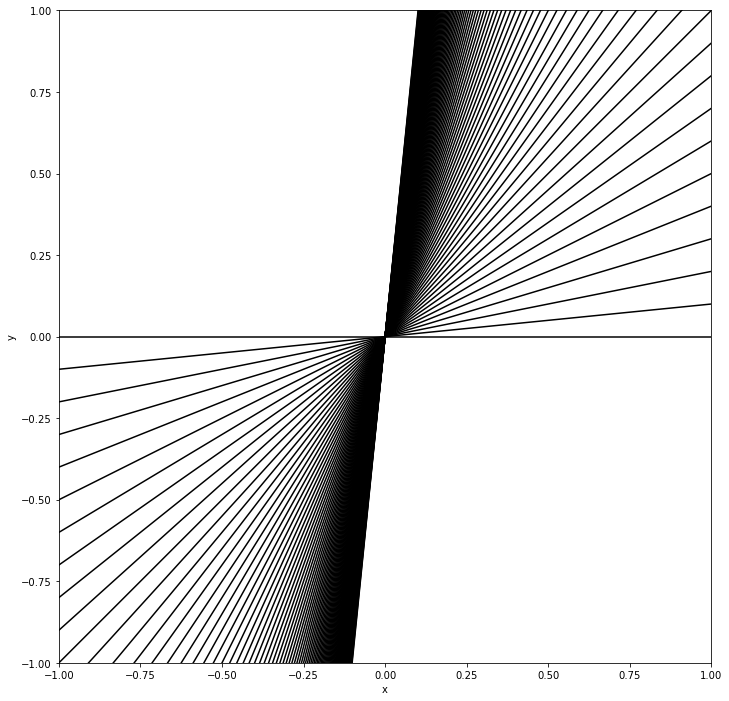

In [3]:
import matplotlib.pyplot as plt
import numpy as np

fig, ax = plt.subplots(subplot_kw=dict(aspect='equal'), figsize=(12, 12))
x = np.linspace(-1, 1)

for slope in np.arange(0, 10, 0.1):
    plt.plot(x, slope * x, '-k')

ax.axis([-1, 1, -1, 1], aspect='equal');
plt.xlabel('x')
plt.ylabel('y')
plt.show() 

Oh dear!

Answer: **The uniform prior for $a$ is not an uninformative prior!**

These lines have evenly-spaced slopes in units of 0.1, yet the higher slopes 
are bunched together. Due to this bunching, a flat prior on slope will highly 
favor very steep slopes! A flat prior on slope is not a minimally informative 
prior, and **may end up biasing your result for small datasets** (with enough data 
the effect vanishes).

An uninformative prior for the slope can be derived by requiring symmetry 
(the same answers) between fitting y vs. x and x vs. y. The result is:

$$   p(a) \propto \frac{1}{(1 + a^2)^{3/2}}. $$

Note that $a$ is the tangent of the angle with the $x$ axis, $\theta$, $a=tan(\theta)$,
and $p(a)$ is
defined for $-\infty < a < \infty$.

We will solve this problem with uninformative and flat priors for $a$ next
week (after we introduce Markov Chain Monte Carlo method and tools).  

## What Have We Learned

* Bayesian definition considers probability as quantified belief (quantified knowledge). That lets us reason about the probabilities of model parameters (and of entire hypotheses).
* Bayesian framework gives us one, simple, universal, rule (Bayes rule) for inference, given new data.
* The price we pay is in the need to specify a prior (which may not be objectivelly possible all the time), and the computational cost.